# Handwritten digit recogniser



In [106]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn import preprocessing
import pickle
from keras.models import model_from_yaml


The code below is used to visualise the images from the data set. 

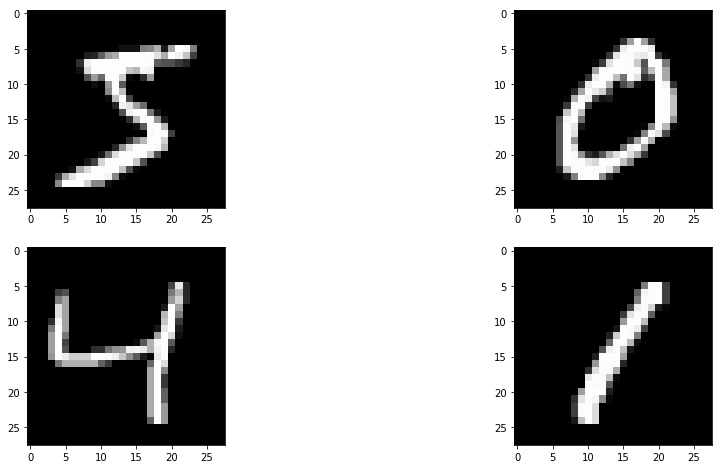

In [116]:
#load (download if needed) the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# plot 4 images as gray scale
fig = plt.figure()
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

fig.set_size_inches(16,8)


# show the plot
plt.show()

**Defining some useful functions**

In [117]:
def classifier():
    """
    Creates an model for MNIST image classification with input dimension 784
    returns: Keras model
    """
    
    model = Sequential()
    model.add(Dense(num_pixels,input_dim=num_pixels,kernel_initializer='normal',activation='relu'))
    model.add(Dense(int(num_pixels/2),activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(int(num_pixels/2),activation='relu'))
    model.add(Dense(int(num_pixels/2),activation='relu'))
    
    model.add(Dense(num_classes,activation='softmax'))
    
    return model

def writeResultsToFile(events,filePath):
    """
    Writes events to pickle file. Ideally dump few objects where the objects could be any data structures
    containing other objects
    :param events:
    :param filePath:
    """
    print("Writing...")
    if filePath[-3:]!="pkl":
        filePath = filePath+".pkl"

    with open(filePath, "wb") as output:

        pickle.dump(events, output, pickle.HIGHEST_PROTOCOL)
        
def loadResultsFromFile(filePath,python2 = False):
    """
    Loads objects from pickle file
    :param filePath:
    :return: values in pickle file
    """
    load = []
    print("Loading...")
    with open(filePath, "rb") as file:
        hasNext = True
        if python2:

            load.append(pickle.load(file))
        else:
            load.append(pickle.load(file, encoding='latin1'))
        while hasNext:
            try:
                if python2:
                    load.append(pickle.load(file))
                else:
                    load.append(pickle.load(file, encoding='latin1'))
            except:
                hasNext = False

    if len(load) == 1:
        return load[0]
    else:
        return load
    


In [126]:
# flatten 28*28 images to a 784 vector for each image
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

num_classes = 10


# Scale Data 
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaler.fit(x_train)
x_train = scaler.transform(x_train)

scaler.fit(x_test)
x_test = scaler.transform(x_test)


# Create and compile model

model = classifier()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,validation_data=(x_test, y_test), epochs=10, batch_size=200,verbose = 1)


yaml_string = model.to_yaml()
writeResultsToFile(yaml_string,"model_yaml.pkl")
model.save_weights('neural_net_weights')





Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.2395 - acc: 0.9286 - val_loss: 0.1120 - val_acc: 0.9645
Epoch 2/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.0877 - acc: 0.9728 - val_loss: 0.0800 - val_acc: 0.9737
Epoch 3/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.0583 - acc: 0.9813 - val_loss: 0.0742 - val_acc: 0.9769
Epoch 4/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.0470 - acc: 0.9855 - val_loss: 0.0717 - val_acc: 0.9783
Epoch 5/10
60000/60000 [==============================] - 17s 292us/step - loss: 0.0357 - acc: 0.9891 - val_loss: 0.0738 - val_acc: 0.9789
Epoch 6/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.0275 - acc: 0.9915 - val_loss: 0.0702 - val_acc: 0.9822
Epoch 7/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.0273 - acc: 0.9915 - val_loss: 0.

In [127]:
model_loaded = loadResultsFromFile('model_yaml.pkl')
model_loaded = model_from_yaml(model_loaded)
model_loaded.load_weights('neural_net_weights')

Loading...


In [ ]:
# Testing loaded model




In [48]:
# y_train = np_utils.to_categorical(y_train)
# y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


10

In [59]:
print(prediction)

ValueError: Error when checking : expected dense_13_input to have shape (None, 784) but got array with shape (784, 1)

In [82]:
import numpy as np
example = x_train[0]
example = example.reshape(1,784)
solution  = model.predict(example)

print(np.argmax(solution))

0


In [88]:

# model = model_from_yaml(yaml_string)

Writing...


In [91]:
def loadResultsFromFile(filePath,python2 = False):
    """
    Loads objects from pickle file
    :param filePath:
    :return: values in pickle file
    """
    load = []
    print("Loading...")
    with open(filePath, "rb") as file:
        hasNext = True
        if python2:

            load.append(pickle.load(file))
        else:
            load.append(pickle.load(file, encoding='latin1'))
        while hasNext:
            try:
                if python2:
                    load.append(pickle.load(file))
                else:
                    load.append(pickle.load(file, encoding='latin1'))
            except:
                hasNext = False

    if len(load) == 1:
        return load[0]
    else:
        return load
    

model_loaded = loadResultsFromFile('model_1.pkl')

Loading...


In [119]:
model_loaded = loadResultsFromFile('model_1.pkl')
model_loaded = model_from_yaml(model_loaded)
model_loaded.load_weights('neural_net_work')


Loading...


In [128]:
example = x_train[0]
example = example.reshape(1,784)

print(np.argmax(model_loaded.predict(example)))

5


In [ ]:
model = 